In [3]:
!pip install mne

In [4]:
## For export EEG/MEG raw data (.fif) into EEGLAB format (.set/.edf)
!pip install eeglabio

In [5]:
## For network specification of IDTxl
! pip install networkx
! pip install JPype1
#! apt install openjdk-9-jre ## for install JAVA_HOME env variable

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 5.5 MB/s eta 0:00:00


In [10]:
#print(path_idtxl)
### Install IDTxl
!pip install '/content/drive/My Drive/IDTxl-master/'

Processing ./drive/My Drive/IDTxl-master
  Preparing metadata (setup.py) ... done
  Created wheel for idtxl: filename=idtxl-1.5.1-py3-none-any.whl size=795926 sha256=a5dcea00a0c544156dfce9ff94824c74808f28e24bb149f1e8ca33589c523add
  Stored in directory: /root/.cache/pip/wheels/21/fd/00/f6aabc1a11e2a4eb55be7d34c434f939aaaa1f05442dd652ac
Successfully built idtxl


In [6]:
#%matplotlib inline
#%tensorflow_version 1.x
import tensorflow as tf
import pandas as pd
import numpy as np
from tqdm import notebook
from sklearn.decomposition import FastICA
import numba as nb
import seaborn as sns
import mne
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import mne
import scipy
from joblib import parallel, delayed

import numpy as np
import pandas as pd
from mne.io import RawArray
from mne import EpochsArray
#import mne.preprocessing.compute_current_source_density
#from mne.channels import read_montage
from mne.epochs import concatenate_epochs
from mne import create_info, find_events, Epochs
#from mne.viz.topomap import _prepare_topo_plot, plot_topomap
from mne.decoding import CSP

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, LeaveOneGroupOut
from glob import glob

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from scipy.signal import welch
from mne import pick_types
from subprocess import check_output

from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,corrmap)
from mne.time_frequency.tfr import morlet
from mne.viz import plot_filter, plot_ideal_filter
import eeglabio


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
#path = '/content/drive/My Drive/MA_ICPR'
#path = '/content/drive/My Drive/Face_MultimodalDataset_ISI/S1/'
#path_idtxl= '/content/drive/My Drive/PolicyPaper_Personal/IDTxl-master/'
path = '/content/drive/My Drive/MICCAI_2024/EEG_ADHD_Sweden/Dataset/HBN/Release_10/'
path_img= '/content/drive/My Drive/MICCAI_2024/EEG_ADHD_Sweden/Results/'

In [ ]:
## 1. Load the dataset of EEGLAB
raw_fname = path + 'S4_SSBlock1_HBN.set'
raw= mne.io.read_raw_eeglab(raw_fname)
print(raw)
#print(ep_stimON)

Reading /content/drive/My Drive/MICCAI_2024/EEG_ADHD_Sweden/Dataset/HBN/Release_10/S4_SSBlock1_HBN.fdt


<ipython-input-8-b6aa1c1656b1>:8: RuntimeWarning: Data file name in EEG.data (S4_SSBlock1_Rel10.fdt) is incorrect, the file name must have changed on disk, using the correct file name (S4_SSBlock1_HBN.fdt).
  raw= mne.io.read_raw_eeglab(raw_fname)


<RawEEGLAB | S4_SSBlock1_HBN.fdt, 13 x 129118 (258.2 s), ~24 kB, data not loaded>


In [ ]:
## Filtering
raw_loaded=raw.load_data()
filt_raw = raw_loaded.filter(l_freq=1., h_freq=40)


Reading 0 ... 129117  =      0.000 ...   258.234 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)



In [ ]:
## Filering and Read all events of different classes
#raw.info
events, all_event_id = mne.events_from_annotations(filt_raw)
print(events)

Used Annotations descriptions: ['4   ', '8   ', '93  ', 'break cnt']
[[    0     0     4]
 [ 8686     0     3]
 [ 9074     0     1]
 [ 9204     0     2]
 [ 9930     0     1]
 [10058     0     2]
 [10786     0     1]
 [10913     0     2]
 [11640     0     1]
 [11768     0     2]
 [12496     0     1]
 [12623     0     2]
 [13350     0     1]
 [13478     0     2]
 [14206     0     1]
 [14334     0     2]
 [15060     0     1]
 [15188     0     2]
 [15916     0     1]
 [16044     0     2]
 [16771     0     1]
 [16898     0     2]
 [17626     0     1]
 [17754     0     2]
 [18481     0     1]
 [18608     0     2]
 [19336     0     1]
 [19464     0     2]
 [20191     0     1]
 [20318     0     2]
 [21046     0     1]
 [21174     0     2]
 [21901     0     1]
 [22028     0     2]
 [22756     0     1]
 [22884     0     2]
 [23611     0     1]
 [23738     0     2]
 [24466     0     1]
 [24594     0     2]
 [25321     0     1]
 [25448     0     2]
 [26176     0     1]
 [26304     0     2]
 [27031

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Using matplotlib as 2D backend.


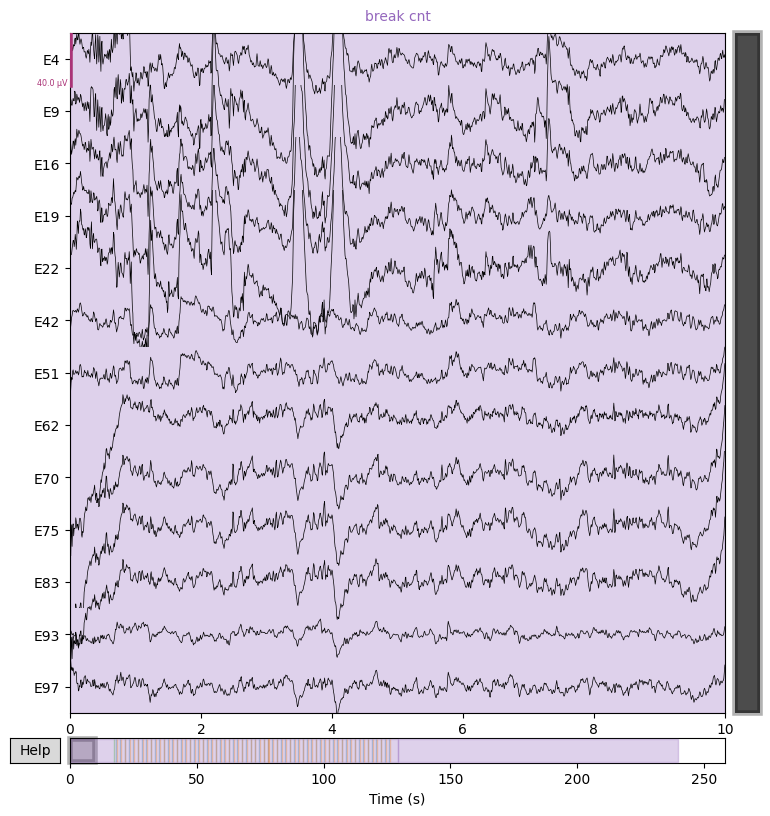

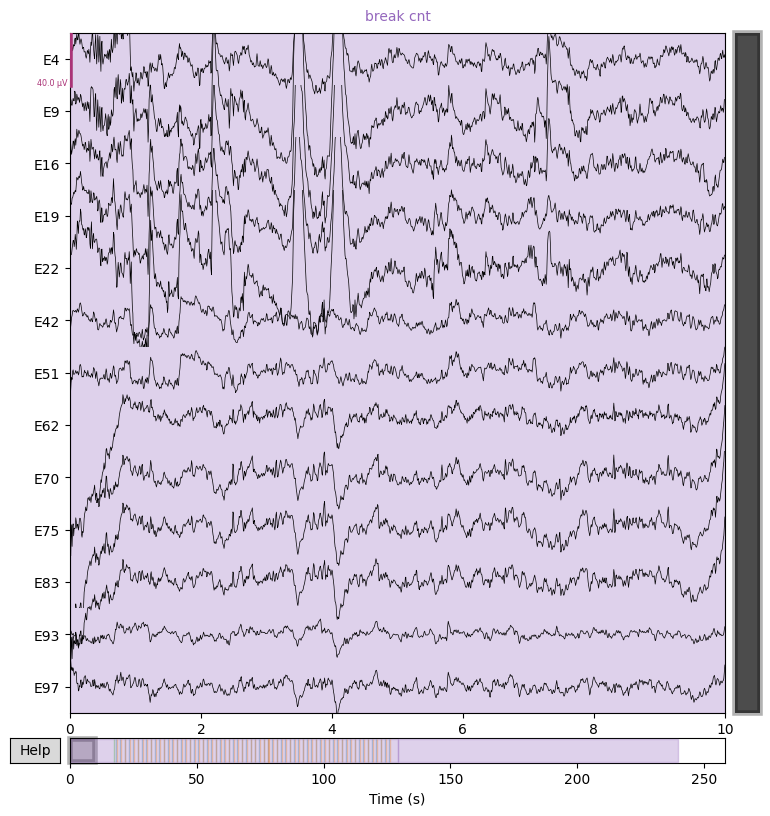

In [ ]:
### FOR ALL 72 CHANNELS---------------------------
## Small subset 32 channels (10-20)
## ADHD specific 13 input channels . Check the Channel names from Hydrocel Electrode placement system
filt_raw=raw.pick_channels(['E4','E9', 'E16', 'E19', 'E22', 'E42','E51', 'E62','E70','E75','E83','E93', 'E97'])

filt_raw=filt_raw.pick('eeg')

# #raw.plot(order=chan_idxs)
filt_raw.plot()


Not setting metadata
64 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 64 events and 1201 original time points ...
0 bad epochs dropped


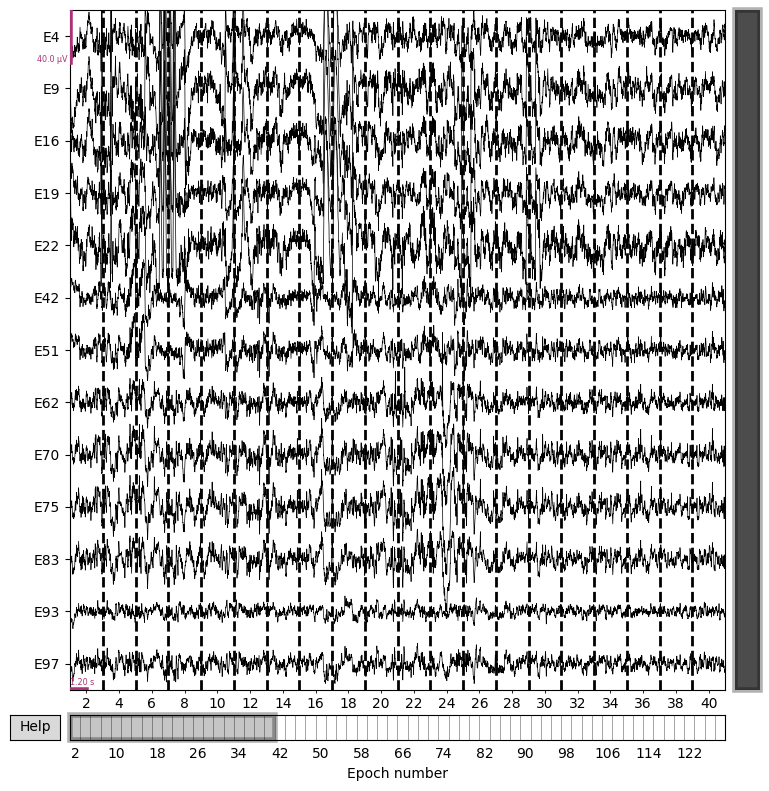

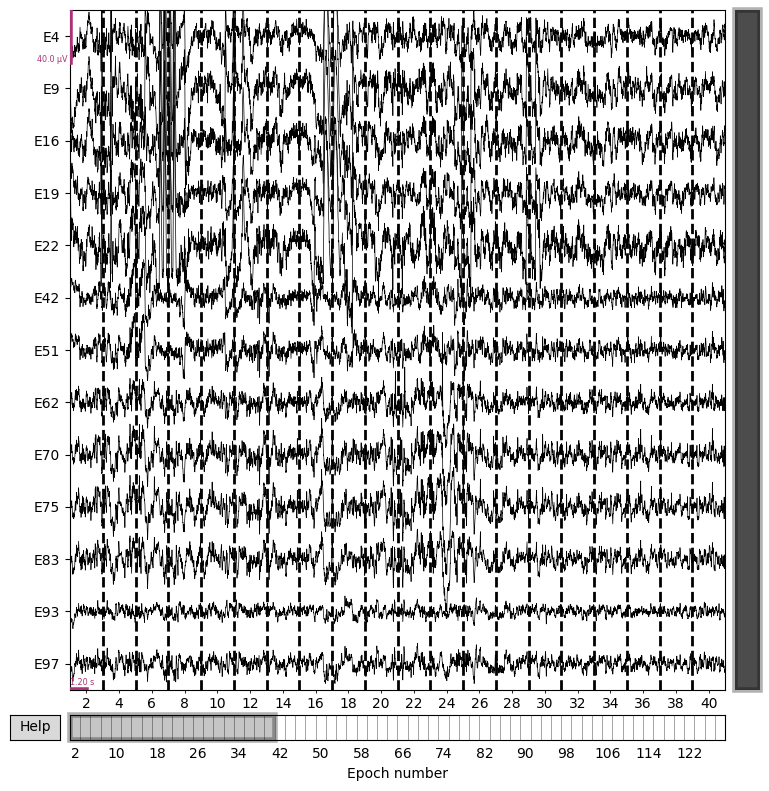

In [ ]:
## evoked data of EEG channel with famous data (event_id=5,6,7)

#Event 1 (stimulus ON of Surround Supression task)
event_dict = {'Stim_ON': 1}

ep_stimon = Epochs(raw = filt_raw, events=events, event_id=event_dict, tmin=0.5, tmax=2.9, baseline=None, preload=True, verbose=True) #epochs with CSD/Laplacian filter
ep_stimon.plot()


Not setting metadata
64 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 64 events and 1201 original time points ...
0 bad epochs dropped


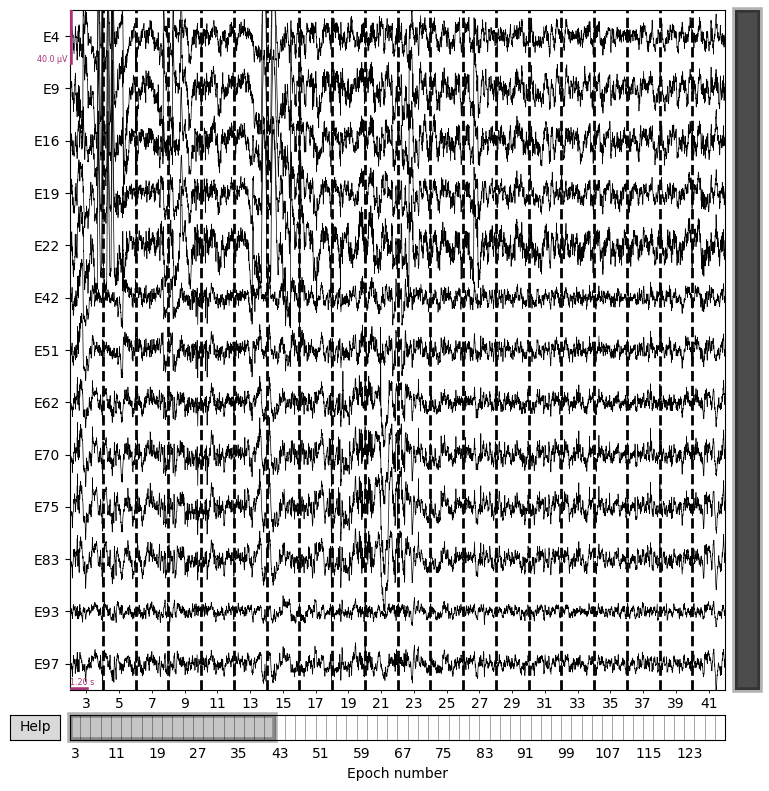

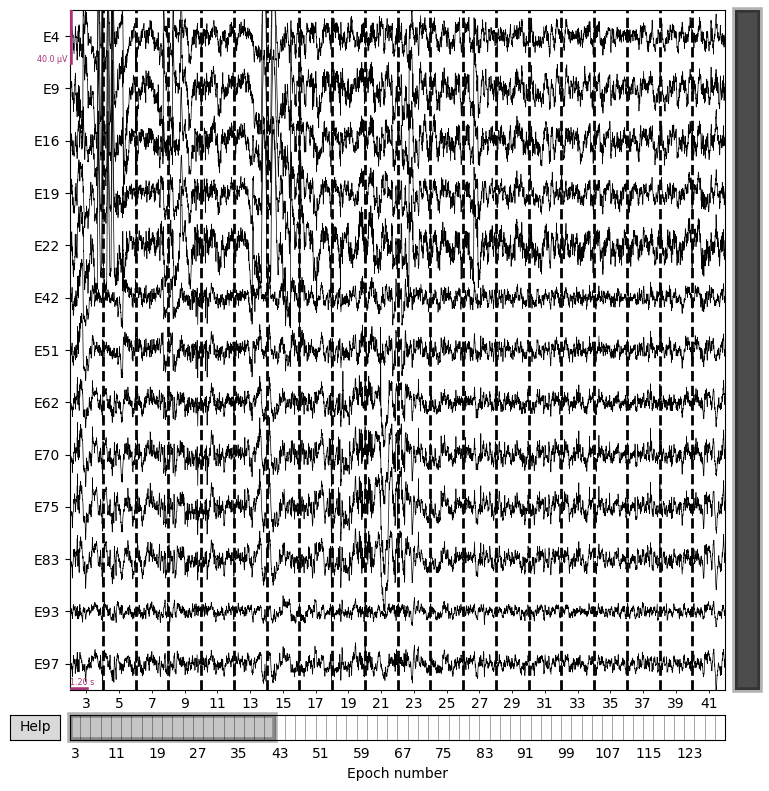

In [ ]:
## Event2 (Stimulus off) of Surround supression task
event_dict = {'Stim_Off': 2}
ep_stimoff = Epochs(raw = filt_raw, events=events, event_id=event_dict, tmin=3.4, tmax=5.8, baseline=None, preload=True, verbose=True) #epochs with CSD/Laplacian filter
ep_stimoff.plot()

In [ ]:
df_StimON = ep_stimon.to_data_frame(picks=['eeg'])
df_StimON.drop(df_StimON.columns[[0, 1, 2]], axis=1, inplace=True) ## event cutter with multiple instances(delete epoch extra columns)
np_StimON=np.array(df_StimON)
df_StimON.head()

,E4,E9,E16,E19,E22,E42,E51,E62,E70,E75,E83,E93,E97
0,13.885851,30.898720,23.644618,23.889286,45.890733,7.310271,6.014959,3.129250,6.957986,7.756861,3.650202,-0.106348,0.463412
1,12.778500,29.292626,23.774998,24.916199,47.405284,9.123606,7.890921,4.053352,7.913630,8.326757,4.056472,-0.841126,0.337041
2,11.465777,27.385925,23.455805,25.643125,48.719958,10.716141,9.684363,5.166866,8.913010,8.928366,4.569053,-1.457410,0.185984
3,10.160173,25.433691,22.932139,26.354423,50.256432,12.108920,11.301442,6.186401,9.854933,9.477495,5.065279,-1.968546,-0.021985
4,9.029330,23.631081,22.405294,27.255070,52.226774,13.329567,12.667840,6.836406,10.652217,9.950794,5.465936,-2.395639,-0.298925


In [ ]:
df_StimOFF = ep_stimoff.to_data_frame(picks=['eeg'])
df_StimOFF.drop(df_StimOFF.columns[[0, 1, 2]], axis=1, inplace=True) ## event cutter with multiple instances(delete epoch extra columns)
np_StimOFF=np.array(df_StimOFF)
df_StimOFF.head()

,E4,E9,E16,E19,E22,E42,E51,E62,E70,E75,E83,E93,E97
0,-2.560610,-7.516138,-2.799028,2.733621,-1.196425,1.480462,1.841459,-1.178700,-2.499697,-4.073590,-2.060137,0.880842,2.073473
1,-2.827381,-7.606304,-2.428432,2.210471,-1.057933,0.687134,0.962358,-1.673576,-2.811623,-3.949655,-1.916597,1.272464,2.176906
2,-2.979391,-7.818350,-2.057183,1.710764,-1.118560,-0.128017,0.055857,-2.170847,-3.073954,-3.850323,-1.784850,1.846046,2.389909
3,-3.009573,-8.100046,-1.740088,1.354509,-1.361247,-0.801701,-0.686477,-2.486676,-3.205346,-3.779440,-1.640739,2.552288,2.737931
4,-2.908024,-8.334092,-1.488487,1.255690,-1.711248,-1.196985,-1.100608,-2.341866,-3.126946,-3.704152,-1.445606,3.314007,3.198940


In [ ]:
np

In [ ]:
## Graph 2 (S2)
from idtxl.multivariate_te import MultivariateTE
from idtxl.bivariate_te import BivariateTE
from idtxl.multivariate_mi import MultivariateMI
from idtxl.bivariate_mi import BivariateMI
from idtxl.estimators_jidt import JidtDiscreteCMI
from idtxl.data import Data

from idtxl.idtxl_utils import calculate_mi
#from idtxl.multivariate_te. import knn
import jpype as jp

#event 1
#np_StimOn1=df_StimON[:,:] # total samples for 2.4s (500 hz sampling freq) with 2 repetations
np_StimOn2=np_StimON[:500,:] ## partial samples
np_StimOn2 = np_StimOn2.reshape((250, np_StimOn2.shape[1], 2))

## event 2
#np_StimOff1=np_StimOFF[:,:] ## all samples
np_StimOff2=np_StimOFF[:500,:]
np_StimOff2 = np_StimOff2.reshape((250, np_StimOff2.shape[1], 2))

dat = Data(np_StimOn2, dim_order='spr')
#dat = Data(np_StimOff2, dim_order='spr')

settings = {
    #'cmi_estimator': 'JidtGaussianCMI',
    'cmi_estimator':  'JidtKraskovCMI',
            'n_perm_max_stat': 100,
            'n_perm_min_stat': 100,
            'n_perm_omnibus': 100,
            'n_perm_max_seq': 100,
            #'max_lag_sources': 20,
            'max_lag_sources': 5, ## maximum previous time points of source node (X)
            'min_lag_sources': 1, ## minimum previous time points of source node (X)
            'alpha_fdr': 0.05}
network_analysis = MultivariateTE()
#network_analysis1 = BivariateTE()
results_S2 = network_analysis.analyse_network(settings, dat) ## All sources, targets
print(results_S2)

Adding data with properties: 13 processes, 250 samples, 2 replications
overwriting existing data

####### analysing target with index 0 from list [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
PyOpenCl is not available on this system. Install it using pip or the package manager to use OpenCL-powered CMI estimation.

MPI is not available on this system. Install itfrom https://pypi.org/project/mpi4py/ to useMPI parallelization.



  File "/usr/local/lib/python3.10/dist-packages/idtxl/estimators_opencl.py", line 9, in <module>
    import pyopencl as cl
  File "/usr/local/lib/python3.10/dist-packages/idtxl/estimators_mpi.py", line 11, in <module>
    from mpi4py.futures import MPIPoolExecutor

    Error importing Cython fast embedding module for HDE estimator.

    When running the HDE estimator, the slow Python implementation for optimizing the HDE embedding will be used,

    this may take a long time. Other estimators are not affected.

    



Target: 0 - testing sources [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

---------------------------- (1) include target candidates
candidate set: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
testing candidate: (0, 1) 
maximum statistic, n_perm: 100
testing candidate: (0, 2) maximum statistic, n_perm: 100
testing candidate: (0, 5) maximum statistic, n_perm: 100
testing candidate: (0, 3) maximum statistic, n_perm: 100
testing candidate: (0, 4) maximum statistic, n_perm: 100
 -- not significant

---------------------------- (2) include source candidates
candidate set: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (10, 1), (10, 2), (10, 3), (10, 4), (10, 5), (11, 1), (11, 2), (11, 3), (

In [ ]:
# ## compute MTE values for significant sources and the specific target
target = 5
results_target = results_S2.get_single_target(target, fdr=False)
sign_sources = np.unique([s for s in results_target['selected_vars_sources'][0]])
print(sign_sources)
for i, source in enumerate(sign_sources):
  print('{0}-> {1}, TE: {2}'.format(source, target, results_target['te'][i]))


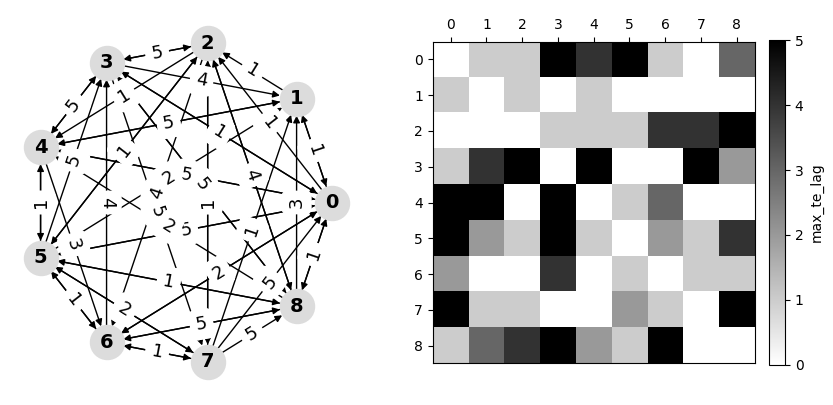

In [ ]:
|## Plot MTE graphs
from idtxl.visualise_graph import plot_network, plot_selected_vars
import matplotlib.pyplot as plt

graph, mat=plot_network(results=results_S2, weights='max_te_lag', fdr=False )
